Introduction

TBC


Import statement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
accidents_df = pd.read_csv('ny_accidents.csv')

Preview the first rows

In [3]:
accidents_df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,237351,A-2953957,2,2020-12-03 20:52:00,2020-12-03 22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,...,False,False,False,False,False,False,Night,Night,Night,Night
1,237362,A-2953968,2,2020-09-25 23:19:55,2020-09-25 23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,...,False,False,False,False,False,False,Night,Night,Night,Night
2,237365,A-2953971,2,2020-10-15 12:17:30,2020-10-16 03:44:00,40.802117,-73.916498,40.804907,-73.911238,0.336,...,False,False,True,False,False,False,Day,Day,Day,Day
3,237402,A-2954008,2,2020-10-03 02:58:56,2020-10-03 04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,...,False,False,False,False,False,False,Night,Night,Night,Night
4,237423,A-2954030,2,2020-09-17 13:19:55,2020-09-17 15:24:11,41.308840,-74.025331,41.307460,-74.027961,0.167,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
accidents_df.shape

(39537, 48)

In [5]:
accidents_df.isnull().sum()

Unnamed: 0                   0
ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance.mi.                 0
Description                  0
Number                   27692
Street                       0
Side                         0
City                         8
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                66
Weather_Timestamp          312
Temperature.F.             390
Wind_Chill.F.             1463
Humidity...                400
Pressure.in.               375
Visibility.mi.             406
Wind_Direction             939
Wind_Speed.mph.           1188
Precipitation.in.         1943
Weather_Condition          343
Amenity                      0
Bump    

In [6]:
accidents_df.isnull().sum().sum()

35557

In [7]:
accidents_df.isnull().values.any()

True

In [8]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ID                     39537 non-null  object 
 2   Severity               39537 non-null  int64  
 3   Start_Time             39537 non-null  object 
 4   End_Time               39537 non-null  object 
 5   Start_Lat              39537 non-null  float64
 6   Start_Lng              39537 non-null  float64
 7   End_Lat                39537 non-null  float64
 8   End_Lng                39537 non-null  float64
 9   Distance.mi.           39537 non-null  float64
 10  Description            39537 non-null  object 
 11  Number                 11845 non-null  float64
 12  Street                 39537 non-null  object 
 13  Side                   39537 non-null  object 
 14  City                   39529 non-null  object 
 15  Co

Find out the percentage of Nulls

In [14]:
per_of_missing_val_in_each_col= (accidents_df.isnull().sum().sort_values(ascending=False)/len(accidents_df))*100
col_with_missing_val = per_of_missing_val_in_each_col[per_of_missing_val_in_each_col > 0]
col_with_missing_val

Number                   70.040721
Precipitation.in.         4.914384
Wind_Chill.F.             3.700331
Wind_Speed.mph.           3.004780
Wind_Direction            2.374991
Visibility.mi.            1.026886
Humidity...               1.011711
Temperature.F.            0.986418
Pressure.in.              0.948479
Weather_Condition         0.867542
Weather_Timestamp         0.789134
Airport_Code              0.166932
Nautical_Twilight         0.020234
Civil_Twilight            0.020234
Sunrise_Sunset            0.020234
Astronomical_Twilight     0.020234
City                      0.020234
dtype: float64

<AxesSubplot:>

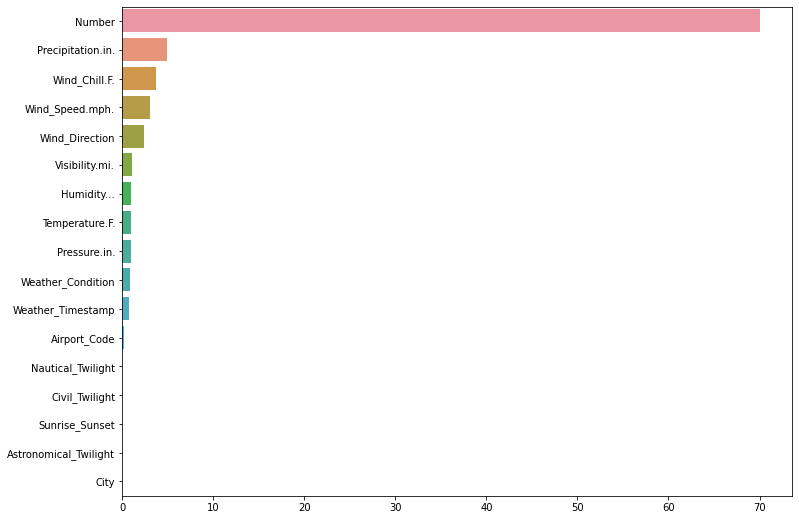

In [15]:
plt.figure(figsize= (12, 9))
sns.barplot(y = col_with_missing_val.index, x = col_with_missing_val)

Drop 'Number' Column

In [20]:
accidents_df2 = accidents_df.drop("Number",axis=1)
accidents_df2.shape

(39537, 47)

In [21]:
accidents_df2.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


Cities and accidents

Text(0, 0.5, 'No. of Accidents')

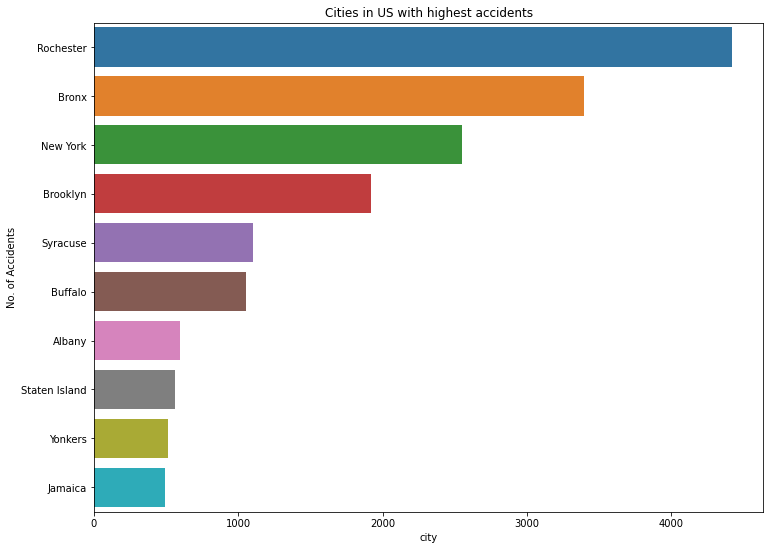

In [23]:
top_cities_df = accidents_df2['City'].value_counts().head(10)
plt.figure(figsize=(12,9))
sns.barplot(y= top_cities_df.index, x = top_cities_df)
plt.title('Cities in US with highest accidents')
plt.xlabel('city')
plt.ylabel('No. of Accidents')